## <center>Tópicos III - Algorítmos Genéticos </center><br>
### Encontrando um Mínimo Global na Função de Rastringin usando Algorítmos Genéticos

Prof. Me. Carlos Igor Ramos Bandeira<br/>
João Vitor Chaves de Oliveira

### 1. Introdução

<p style="text-align: justify;">Um algoritmo genético (GA) é uma metaheurística inspirada no processo de seleção natural que pertence à classe maior de algoritmos evolutivos (EA). Os algoritmos genéticos são comumente usados para gerar soluções de alta qualidade para otimizar e procurar problemas, dependendo de operadores de inspiração biológica, como mutação, cruzamento e seleção. Usaremos algoritmos genéticos neste trabalho para encontrar um mínimo local na função de Rastringin. A função de Rastrigin é uma função não convexa usada como um problema de teste de desempenho para algoritmos de otimização. É um exemplo típico de função multimodal não-linear. Foi proposto pela primeira vez por Rastrigin como uma função bidimensional. Encontrar o mínimo desta função é um problema bastante difícil devido ao seu grande espaço de busca e ao grande número de mínimos locais.</p> </br> A função de Rastringin se configura da seguinte maneira:</p>

<b>$f(x_1,x_2) = 20 + x_{1}^2 + x_{2}^2 - 10[cos(2\pi x_1)+cos(2\pi x_2)]$, onde $x_i \in [-5.12;+5.12], i={1,2}$.</b><br> 
<p style="text-align: justify;">Esta função possui um mínimo global em ${x_1,x_2}= {0,0}$, para o qual $f(x_1,x_2)=0$.<br>
Antes de começarmos a busca por um mínimo global nesta função usando algoritmos genéticos, é essencial estarmos familiarizados com algumas terminologias básicas que serão usadas ao longo deste trabalho e apresentadas na Seção seguinte.</p>


### 2. Fundamentação Teórica

Nesta Seção, apresentaremos algumas definições importantes ao entendimento deste trabalho.<br>

<b>2.1. População</b><br> 
<p style="text-align: justify;">É um subconjunto de todas as possíveis soluções (codificadas)
para o problema dado. A população de um GA é análoga à população para seres humanos, exceto que em vez de seres humanos, temos soluções de candidatos que representam os seres humanos.</p>

<b>2.2. Cromossomos</b><br>

Um cromossomo é uma dessas soluções para o problema dado.

<b>2.3. Gene</b><br> 

Um gene é uma posição de elemento de um cromossomo.

<b>2.4. Genótipo</b><br> 
<p style="text-align: justify;">Genótipo é a população no espaço computacional. No espaço de computação, as soluções são representadas de uma maneira que pode ser facilmente compreendida 
e manipulada usando um sistema de computação.</p>

<b>2.5. Fenótipo</b><br> 
<p style="text-align: justify;">O fenótipo é a população no espaço real da solução real em que as soluções são representadas de forma representada em situações do mundo real.</p>

<b>2.6. Decodificação e codificação</b><br> 
<p style="text-align: justify;">Para problemas simples, os espaços de fenótipo e genótipos são os mesmos. No entanto, na maioria dos casos, os espaços de fenótipo e genótipos são diferentes. <b>Decodificação</b> é um processo de transformação de uma solução do genótipo para o espaço do fenótipo, enquanto a codificação é um processo de transformação do fenótipo para o espaço de genótipos. A <b>decodificação</b> deve ser rápida, uma vez que é realizada repetidamente em um GA durante o cálculo do valor de fitness/aptidão.</p>

<p style="text-align: justify;">Por exemplo, na função de Rastringin o espaço do fenótipo consiste em soluções que apenas contêm os valores de $x_1$ e $x_2$ a serem aplicados na função para gerarem um resultado. No entanto, o espaço de genótipos pode ser representado como uma string binária de comprimento $n$ onde os primeiros $\frac{n}{2}$ elementos da string representam $x_1$, e os outros $\frac{n}{2}$ elementos representam $x_2$. Dessa maneira, este é um caso em que os espaços de genótipos e fenótipos são diferentes.</p>

<b>2.7. Função de Fitness/aptidão</b><br> 
<p style="text-align: justify;">Uma função de fitness simplesmente definida é uma função que leva a solução como entrada e produz a adequação da solução como a saída. Em alguns casos, a função de aptidão e a função objetiva podem ser as mesmas, enquanto em outras pode ser diferente com base no problema.</p>

<b>2.8. Operadores genéticos</b><br> 
<p style="text-align: justify;">Isso altera a composição genética da geração. Estes incluem cruzamento, mutação, seleção, entre outros. Neste caso, nos referiremos apenas a mutação, seleção e mutação.</p>

<b>2.9. Mutação</b><br> 
<p style="text-align: justify;">Um cromossomo é selecionado e a partir de uma probabilidade, ocorre uma mudança no seu em algum gene a partir de uma probabilidade de acontecer esta mutação.</p>

<b>2.10. Cruzamento</b><br> 
<p style="text-align: justify;">Dois cromossomos são selecionados e recombinados para gerar outros dois cromossomos. Um ponto aleatório de cruzamento é escolhido para que ocorra a troca de material genético</p>

<b>2.11. Seleção</b><br> 
<p style="text-align: justify;">Nesta fase, são selecionados uma proporção dos indíviduos mais aptos da população a fim de gerar "herdeiros" mais aptos para assim convergirmos para a solução ótima mais facilmente.</p>

<p style="text-align: justify;">Na Seção seguinte, mostraremos passo a passo da construção do algoritmo genético para a funçaõ de Rastrigin.

### 3. Metodologia

Nesta Seção, mostraremos os passos algorítmicos para se encontrar os resultados desejados.

In [100]:
def Rastringin(X,Y):
        return ( 20+(np.power(X,2)+np.power(Y,2))-(10*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y)) ) )
    

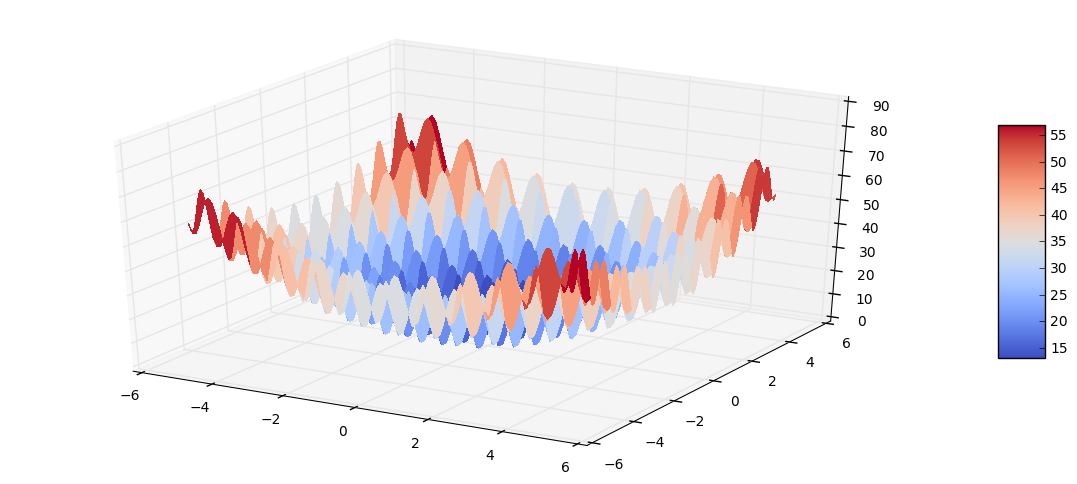

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import rcParams
%matplotlib inline  

rcParams['figure.figsize'] = 15,6

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5.12, 5.12, 0.1)
Y = np.arange(-5.12, 5.12, 0.1)
X, Y = np.meshgrid(X, Y)

Z =  Rastringin(X,Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<b>3.1. Gráficos de contorno</b> <br>
<p style="text-align: justify;">São gráficos que exploram a relação potencial entre três variáveis. Eles exibem a relação tridimensional em duas dimensões, com fatores x e y (preditores) representadas graficamente nas escalas x e y e valores de resposta representados por contornos. Um gráfico de contorno é 
como um mapa topográfico no qual os valores x, y e z são representados graficamente em vez da latitude, longitude e elevação. A seguir, mostraremos a curva de contorno da função de Rastringin.</p>

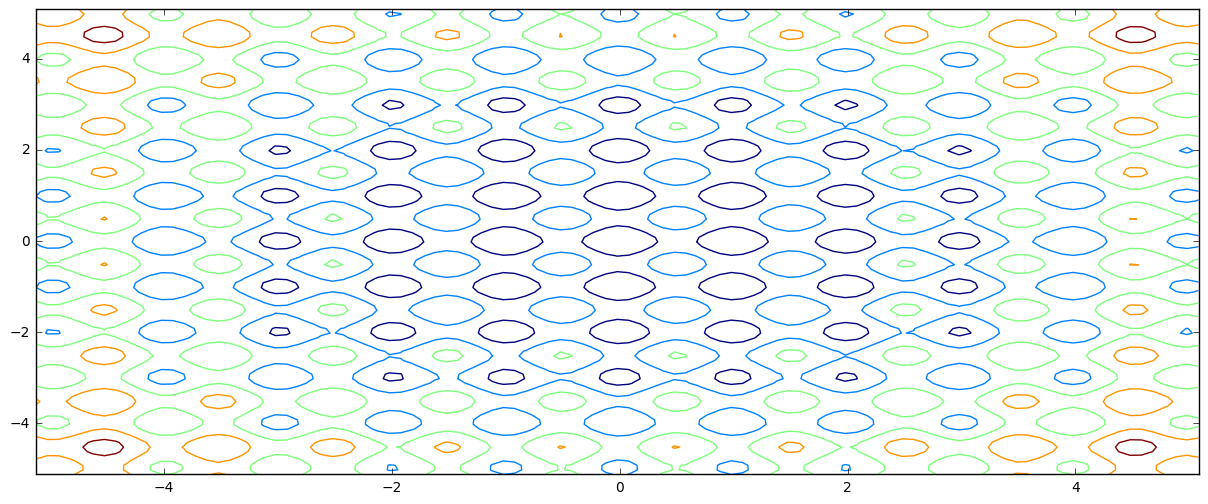

In [39]:
contorno = plt.contour(X,Y,Z) 

<b>3.2. Codificação</b><br>
<p style="text-align: justify;">A codificação dos cromossomos acontece da seguinte maneira: geramos a população com valores de $x_1$ e $x_2$ pertencentes ao domínio da função de Rastringin e daí convertemos este número para sua versão binária de 64 bits. No fim cada cromossomo será uma string de bits de tamanho 128, onde os primeiros 64 bits representam $x_1$, e os outros 64 representam $x_2$.
A função abaixo realiza este processo de conversão de número de ponto flutuante para binário e vice-versa.</p>

In [40]:
def int_to_bytes(n, minlen=0):  # helper function
    nbits = n.bit_length() + (1 if n < 0 else 0)  # plus one for any sign bit
    nbytes = (nbits+7) // 8  # number of whole bytes
    b = bytearray()
    for _ in range(nbytes):
        b.append(n & 0xff)
        n >>= 8
    if minlen and len(b) < minlen:  # zero pad?
        b.extend([0] * (minlen-len(b)))
    return bytearray(reversed(b))  # high bytes first

def float_to_bin(f):
    """ Convert a float into a binary string. """
    ba = struct.pack('>d', f)
    ba = bytearray(ba)  # convert string to bytearray - not needed in py3
    s = ''.join('{:08b}'.format(b) for b in ba)
    return s # strip all leading zeros except for last

def bin_to_float(b):

    bf = int_to_bytes(int(b, 2), 8)
    return struct.unpack('>d', bf)[0]

In [41]:
import random
import struct
import numpy as np
np.seterr(all='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'ignore', 'under': 'ignore'}

<b>3.3. Classe Chromosome</b><br>
<p style="text-align: justify;">Foi criado uma classe cromossomo com todas as operações que serão realizadas em um cromossomo como mutação e recombinação. O processo de mutação ocorre da seguinte maneira: sorteia-se duas probabilidade uma para $x_1$ e outra para $x_2$. Se a primeira probabilidade sorteada for maior que a probabilidade de mutação dada por entrada, então ocorre o processo de mutação para $x_1$ que é representado pelos primeiros 64 bits. Dessa maneira, sorteia-se um número entre 0 e 63 representado cada posição de gene. Se o valor na posição sorteada for 1 troca-se por 0, e se for 0 troca-se por 1.
O processo é análogo para $x_2$, a diferença é que sortearemos um número entre 64 e 127 que são as posições que representam os genes de $x_2$.</p>

In [42]:
class Chromosome  :
    def __init__(self, bitstring) :
        self.bitstring = bitstring
        self.fitness = 999
        
    def __lt__(self, other):
        return (self.fitness < other.fitness)

    def __eq__(self, other):
        return (self.fitness == other.fitness)

    def __gt__(self, other):
        return(self.fitness > other.fitness)

    def __le__(self, other):
        return(self.fitness <= other.fitness)
    
    def __cmp__(self, other) :
        if self.fitness < other.fitness:
            return -1
        elif self.fitness > other.fitness:
            return 1
        else:
            return 0

    def __repr__(self) :
        return ''.join([str(i) for i in self.bitstring])

    def printSolution(self, problem) :
        return self.__repr__()

    def mutate(self, prob) :
        if random.random() < prob :
            index = random.randint(0,63)
            if(self.bitstring[index]=='1'):
                aux1 = self.bitstring[:index]
                aux2 = self.bitstring[(index+1):]
                self.bitstring=(aux1+'0'+aux2)
            else:
                aux1 = self.bitstring[:index]
                aux2 = self.bitstring[(index+1):]
                self.bitstring=(aux1+'1'+aux2)
        
        if random.random() < prob :
            index = random.randint(64,127)
            if(self.bitstring[index]=='1'):
                aux1 = self.bitstring[:index]
                aux2 = self.bitstring[(index+1):]
                self.bitstring=(aux1+'0'+aux2)
            else:
                aux1 = self.bitstring[:index]
                aux2 = self.bitstring[(index+1):]
                self.bitstring=(aux1+'1'+aux2)

    def singlePointCrossover(self, other) :
        pos1 = random.randint(0,63)   
        pos2 = random.randint(0,63)

        t1x1 = self.bitstring[:64]
        t1x2 = self.bitstring[64:]
        t2x1 = other.bitstring[:64]
        t2x2 = other.bitstring[64:]
        
        newt1x1 = t1x1[:pos1]+t2x1[pos1:]
        newt2x1 = t2x1[:pos1]+t1x1[pos1:]
        newt1x2 = t1x1[:pos1]+t2x1[pos1:]
        newt2x2 = t2x1[:pos1]+t1x1[pos1:] 

        e1x1 = bin_to_float(newt1x1)
        e2x1 = bin_to_float(newt2x1)
        e1x2 = bin_to_float(newt1x2)
        e2x2 = bin_to_float(newt2x2)
        
        l = []

        if((e1x1 >= -5.12 and e1x1<=5.12) and (e1x2 >=-5.12 and e1x2<=5.12)):
            l.append(Chromosome(newt1x1+newt2x2))

        if((e2x1 >=-5.12 and e2x1<=5.12) and (e2x2 >=-5.12 and e2x2<=5.12)):
            l.append(Chromosome(newt1x1+newt2x2))

        return l

<b>3.4. Classe GA</b><br>
<p style="text-align: justify;">A classe GA é a classe que faz o processo de busca pela solução ótima. Nela, geramos a população inicial, definimos o fitness/aptidão de cada indivíduo, escolhemos os melhores através da seleção também conhecida como elitismo, e retornamos a solução desejada.</p>

In [43]:
class GA :
    def __init__(self, popsize=10, iterations=100, 
                 elitism=0.1, mutRate=0.9,
                 problemParams=None):
        self.popsize = popsize
        self.iterations = iterations
        self.fractionKept = elitism
        self.mutationRate = mutRate
        self.poplist = []
        self.problemParams = problemParams


    def makeInitialPopulation(self) :    
        for j in range(self.popsize):
            self.poplist.append(Chromosome(float_to_bin(random.uniform(-5.12,5.12))
                                           +float_to_bin(random.uniform(-5.12,5.12))))
            
    def assignFitness(self) :
        for chrom in self.poplist :
                fit = Rastringin(bin_to_float(chrom.bitstring[:64]),
                    bin_to_float(chrom.bitstring[64:]))
                chrom.fitness = fit

    def chooseChromosome(self) :
        c1 = random.choice(self.poplist)
        c2 = random.choice(self.poplist)
        if c1.fitness > c2.fitness:
            return c1
        else:
            return c2

    def makeChildren(self) :
        p1 = self.chooseChromosome()
        p2 = self.chooseChromosome()
        kids = p1.singlePointCrossover(p2)

        for i in kids:
            i.mutate(self.mutationRate)

        return kids


    def runGA(self) :
        melhoresResultados = []
        self.makeInitialPopulation()
        
        for i in range(1, self.iterations+1) :       
            self.assignFitness()
            
            best = min(self.poplist)
            
            s1 = bin_to_float(best.bitstring[:64])
            s2 = bin_to_float(best.bitstring[64:])
            r = Rastringin(s1,s2)
            
            melhoresResultados.append(r)
            newpop = [best]
            
            for j in range(1, int((1.0 - self.fractionKept)*self.popsize)):
                newpop.extend(self.makeChildren())

            while len(newpop) < self.popsize :
                newpop.append(self.chooseChromosome())
            self.poplist = newpop
            
        self.assignFitness()
        best = min(self.poplist)
        print('Resultado:')
        solucao_ = best.printSolution(self.problemParams)
        x1 = bin_to_float(solucao_[:64])
        x2 = bin_to_float(solucao_[64:])
        print("(x1,x2) = (",x1,",",x2,")" )
        print("Solucao: ",Rastringin(x1,x2))
        return melhoresResultados

<b>3.4. Função de plotagem dos gráficos</b><br>
<p style="text-align: justify;">A função à seguir, recebe uma lista de valores referentes ao fitness de indivíduos da população e retorna o gráfico de convergência.</p>

In [44]:
def plotar(X):
    plt.plot(X)
    plt.title("Gráfico da função de aptidão do melhor individuo")
    plt.grid(True)
    plt.xlabel("Iterações")
    plt.ylabel("Fitness/Aptidão")
    plt.show()

Parâmetros default:<br>
Tamanho da população = 10<br>
Iterações = 100<br>
Elitismo = 0.1<br>
Taxa de mutação: 0.9<br>

In [45]:
problema = GA()
melhoresResultados = problema.runGA()

Resultado:
(x1,x2) = ( -2.5055786389734944e-308 , 2.5056465428388053e-308 )
Solucao:  0.0


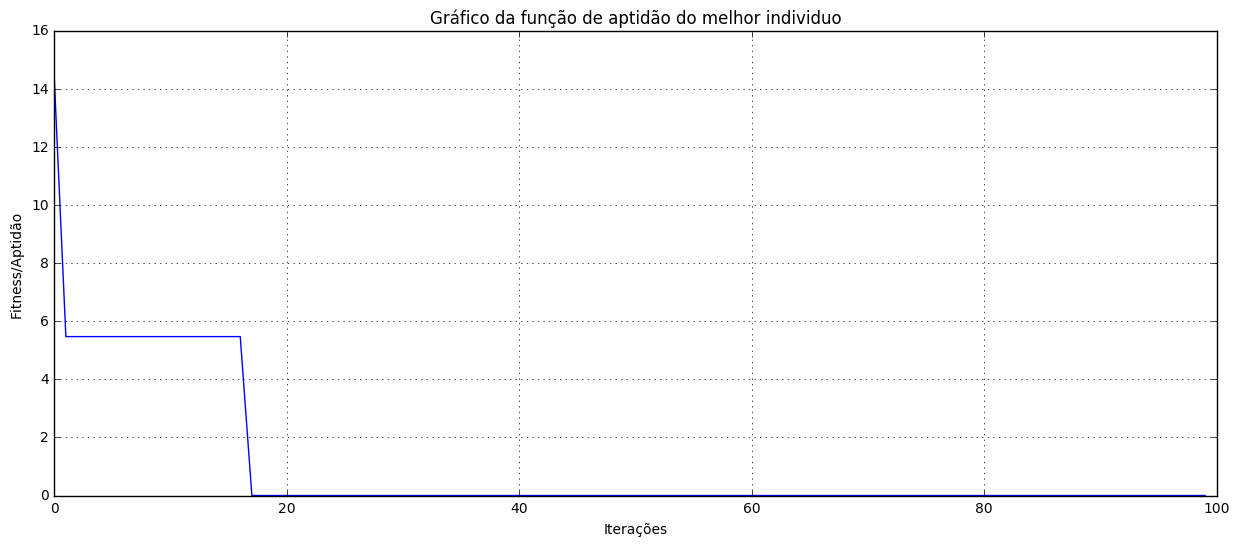

In [46]:
plotar(melhoresResultados)

Parametros:<br>
Tamanho da população = 40<br>
Iterações = 100<br>
Elitismo = 0.1<br>
Taxa de mutação: 0.5<br>

In [47]:
problema = GA(popsize=40,iterations=100,elitism=0.1,mutRate=0.5)
melhoresResultados=problema.runGA()

Resultado:
(x1,x2) = ( 2.505191882747791e-308 , 2.5051918817116603e-308 )
Solucao:  0.0


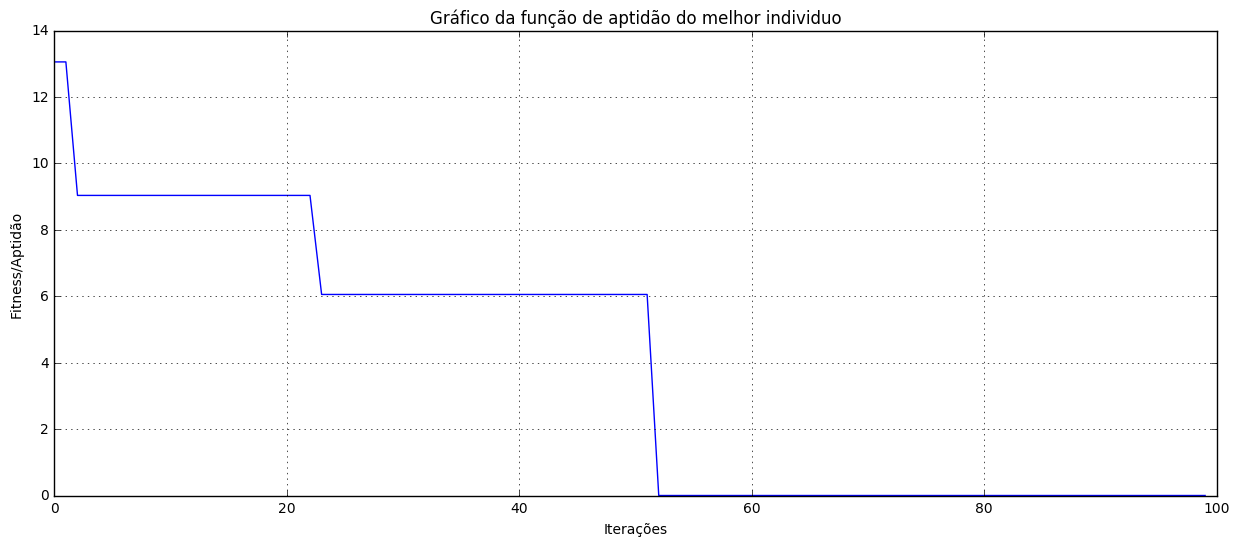

In [48]:
plotar(melhoresResultados)

Parâmetros<br>
Tamanho da população = 10<br>
Iterações = 100<br>
Elitismo = 0.7<br>
Taxa de mutação: 0.8<br>

In [49]:
problema = GA(popsize=10,iterations=100,elitism=0.7,mutRate=0.8)
melhoresResultados=problema.runGA()

Resultado:
(x1,x2) = ( -8.72635699437491e-79 , -2.352626568305569e-11 )
Solucao:  0.0


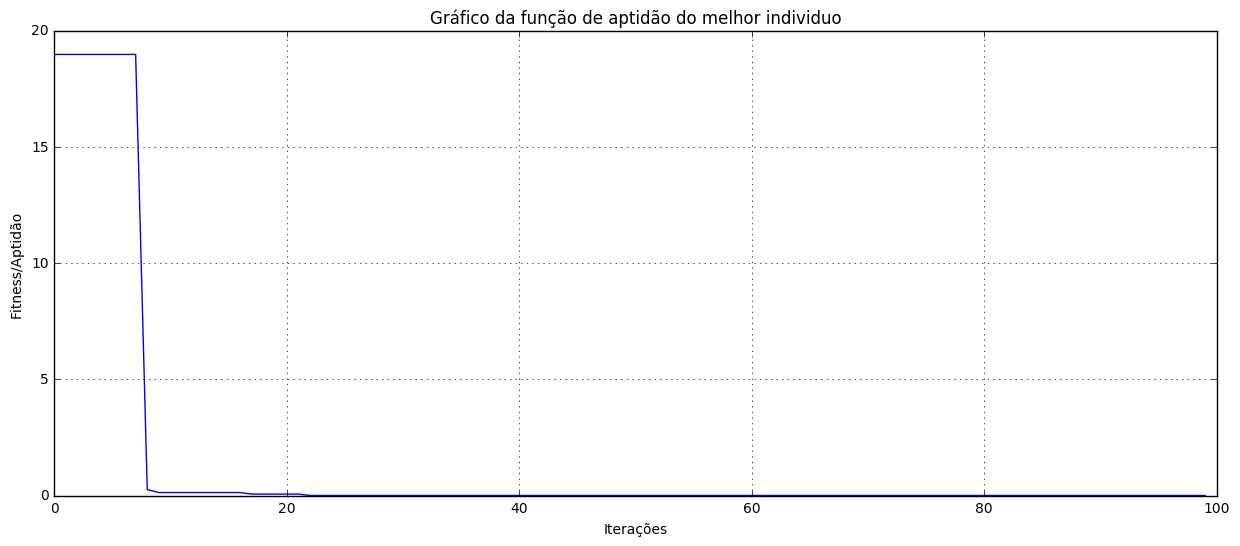

In [50]:
plotar(melhoresResultados)

### 4. Resultados

#### 4.1. Fixando tamanho da população, mutação e iterações e variando o elitismo.

Resultado:
(x1,x2) = ( 1.458906612175644e-309 , 2.3709646523495027e-308 )
Solucao:  0.0


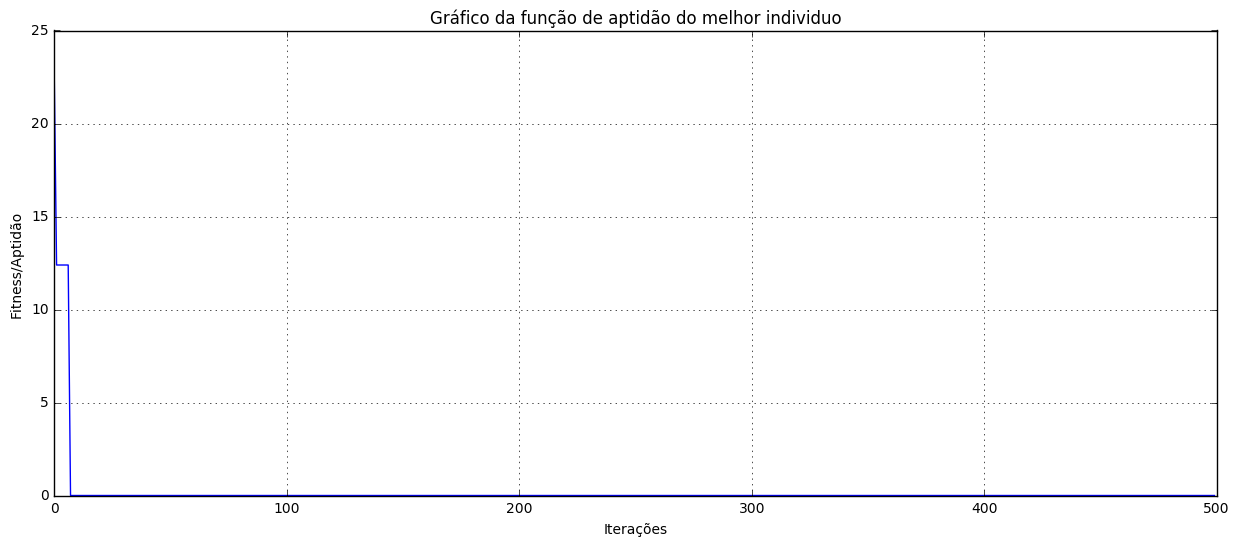

In [51]:
problema = GA(popsize=10,iterations=500,elitism=0.1,mutRate=0.8)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

Resultado:
(x1,x2) = ( -1.3476438260643163e-303 , -1.1653657756602868e-303 )
Solucao:  0.0


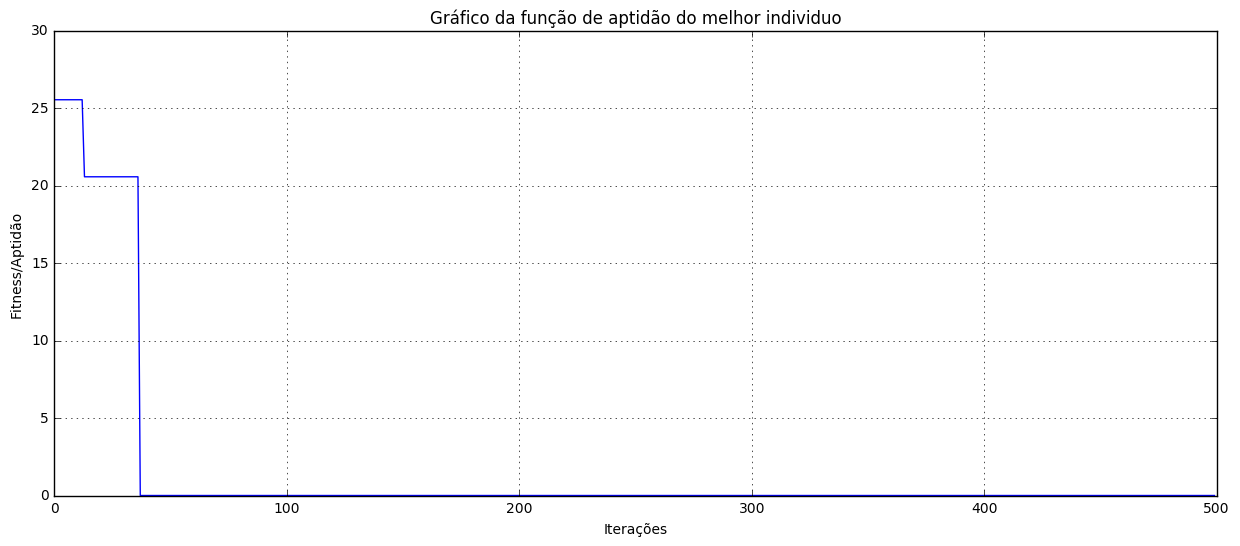

In [52]:
problema = GA(popsize=10,iterations=500,elitism=0.5,mutRate=0.8)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

Resultado:
(x1,x2) = ( 1.8063896203407195 , -1.0377377655452538 )
Solucao:  11.1503426549


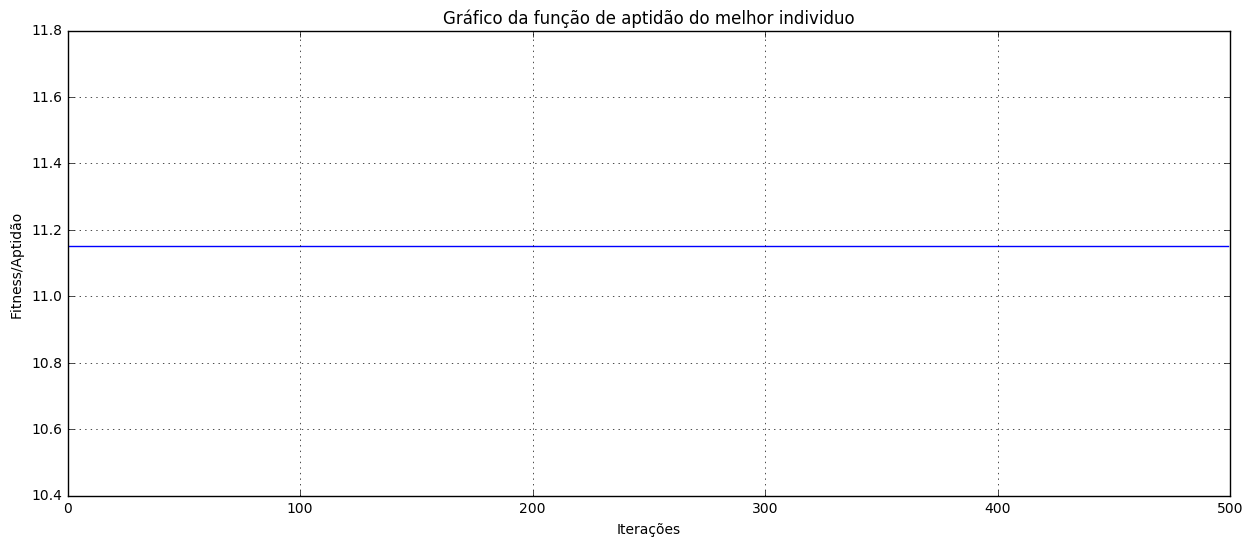

In [53]:
problema = GA(popsize=10,iterations=500,elitism=0.8,mutRate=0.8)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

Resultado:
(x1,x2) = ( -1.8686337349093343 , 1.1965138313068087 )
Solucao:  14.8430623473


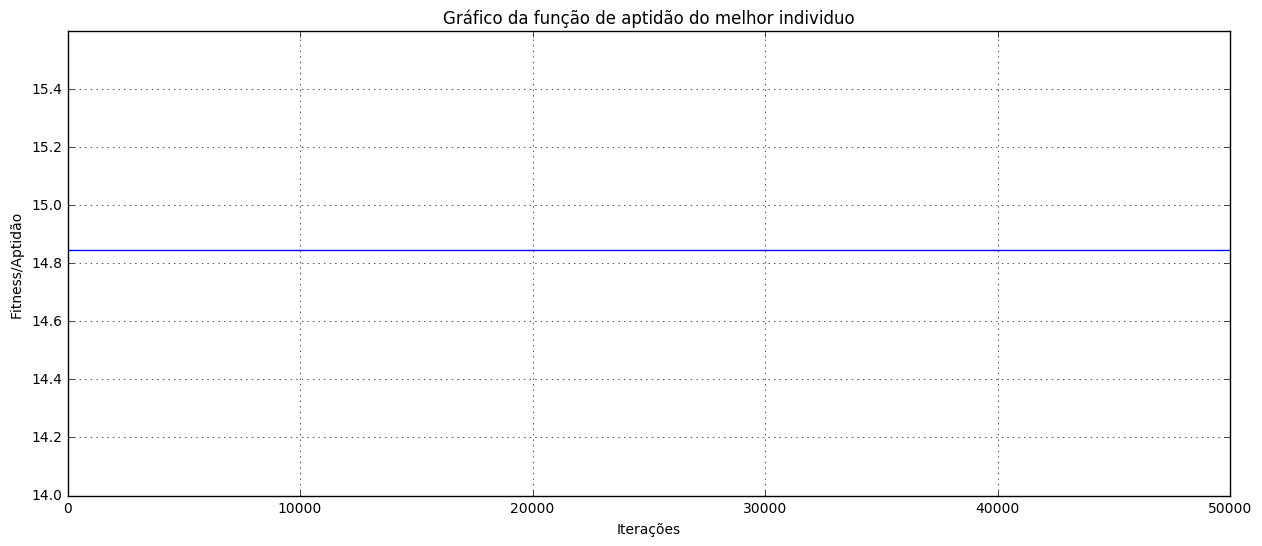

In [64]:
problema = GA(popsize=10,iterations=500,elitism=0.9,mutRate=0.8)
melhoresResultados = problema.runGA()
plotar(melhoresResultados)

#### 4.2. Fixando tamanho da população, elitismo e iterações e variando a taxa de mutação.

Resultado:
(x1,x2) = ( -1.064194113053357e-09 , -1.064194113053357e-09 )
Solucao:  0.0


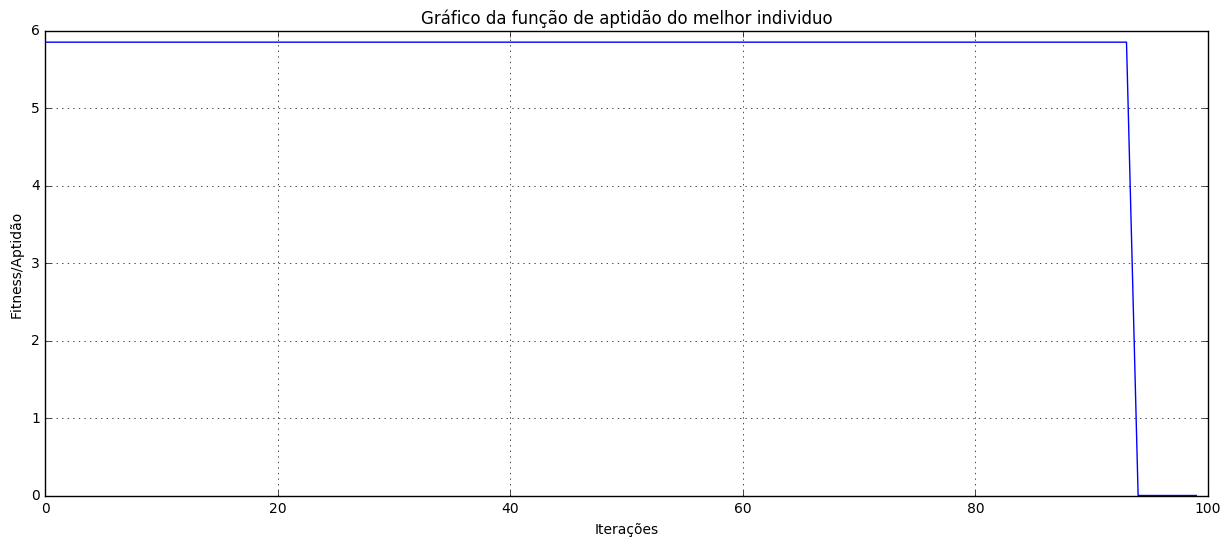

In [81]:
problema = GA(popsize=10,iterations=100,elitism=0.4,mutRate=0.1)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

Resultado:
(x1,x2) = ( -2.202349243535803e-05 , -1.9019859284359915e-82 )
Solucao:  9.62269517402e-08


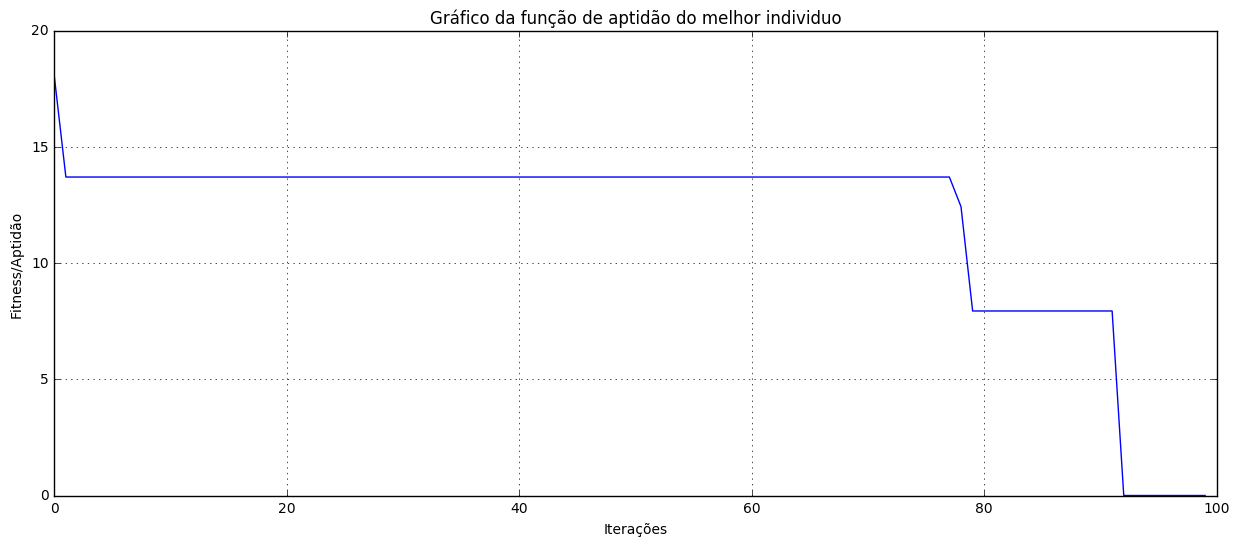

In [83]:
problema = GA(popsize=10,iterations=100,elitism=0.4,mutRate=0.3)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

Resultado:
(x1,x2) = ( -1.9286868782968e-310 , -1.9286868782968e-310 )
Solucao:  0.0


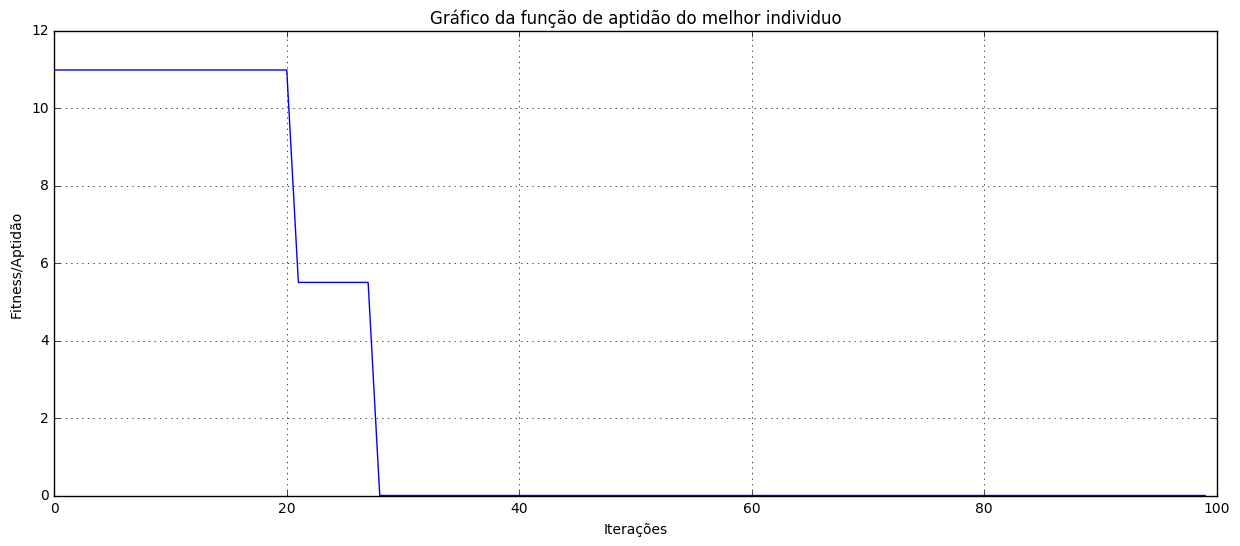

In [85]:
problema = GA(popsize=10,iterations=100,elitism=0.4,mutRate=0.5)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

Resultado:
(x1,x2) = ( 5.14431372001474e-82 , 5.1443137985603103e-82 )
Solucao:  0.0


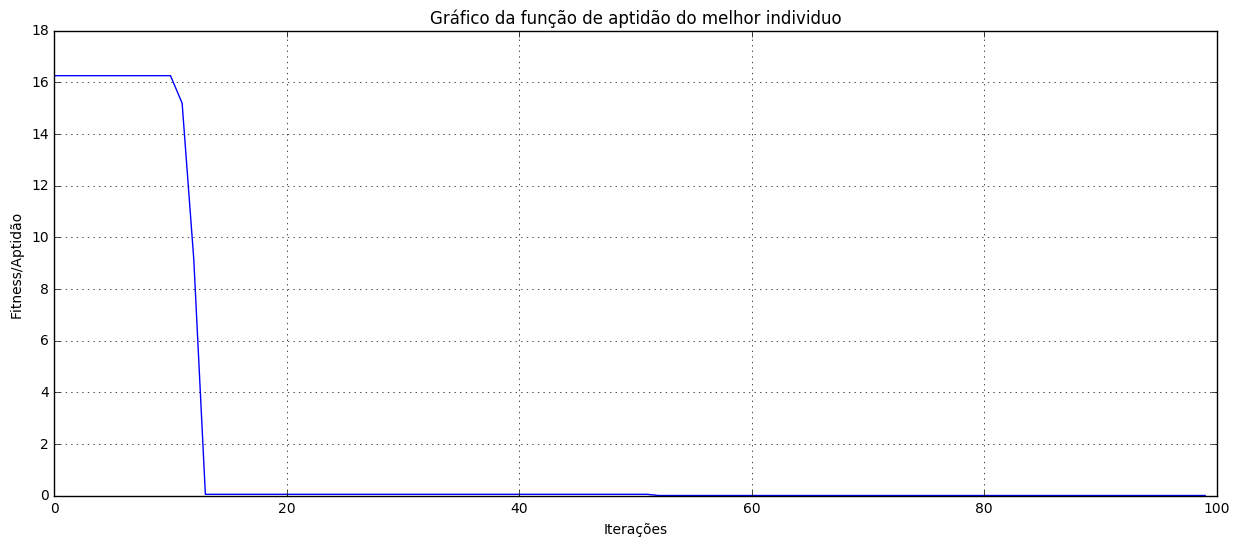

In [87]:
problema = GA(popsize=10,iterations=100,elitism=0.4,mutRate=0.9)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

#### 4.3. Fixando a taxa de mutação, elitismo e iterações e variando o tamanho da população.

Resultado:
(x1,x2) = ( -1.7716304794278702e-154 , -1.7716304794278702e-154 )
Solucao:  0.0


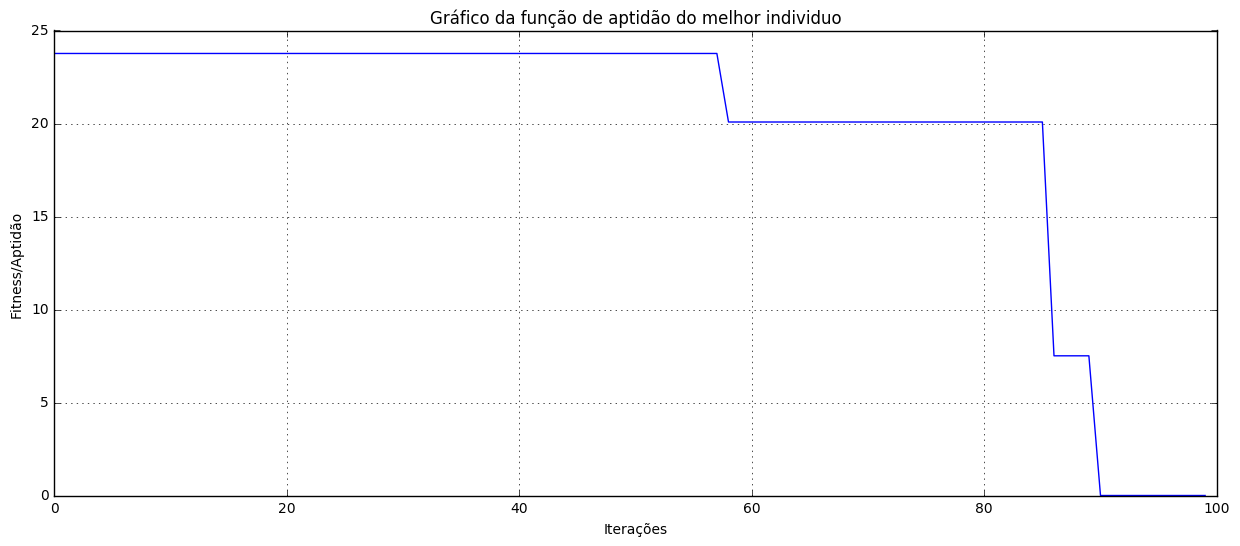

In [96]:
problema = GA(popsize=10,iterations=100,elitism=0.4,mutRate=0.4)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

Resultado:
(x1,x2) = ( -2.826960600665611e-308 , -2.826960600665611e-308 )
Solucao:  0.0


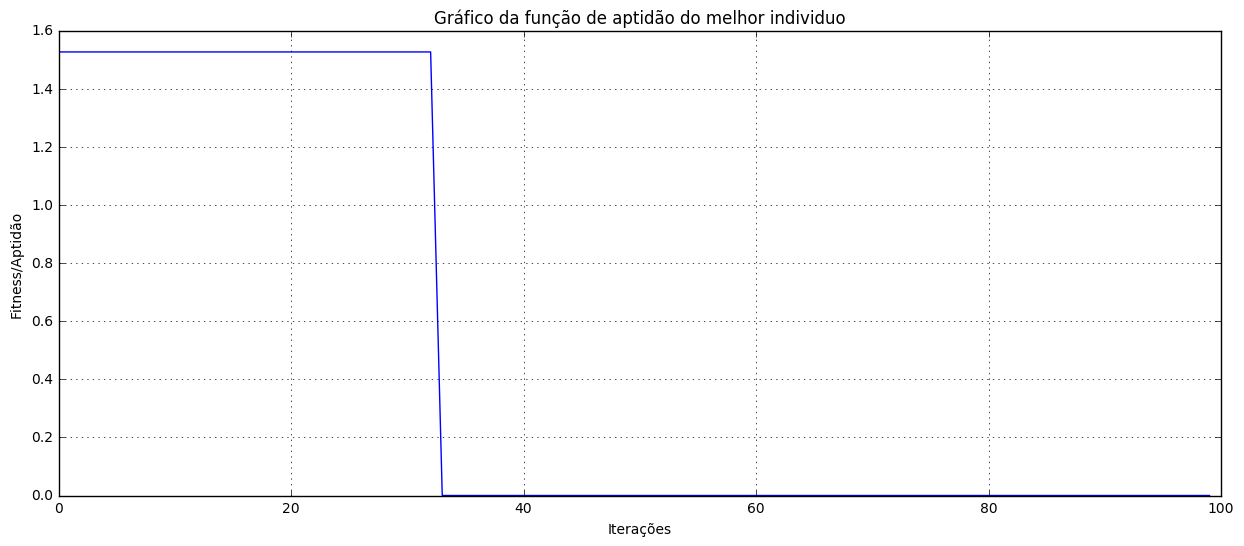

In [97]:
problema = GA(popsize=20,iterations=100,elitism=0.4,mutRate=0.4)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

Resultado:
(x1,x2) = ( 2.8191327002663764e-308 , 2.8191327002663843e-308 )
Solucao:  0.0


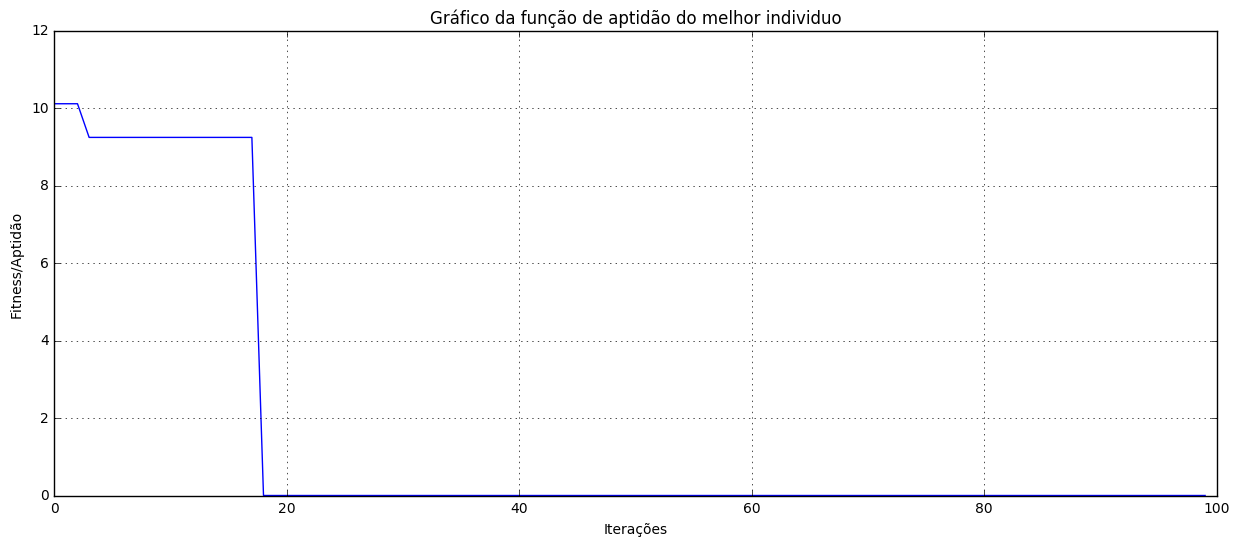

In [98]:
problema = GA(popsize=30,iterations=100,elitism=0.4,mutRate=0.4)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

Resultado:
(x1,x2) = ( 2.463242855766561e-308 , 2.603478069768004e-154 )
Solucao:  0.0


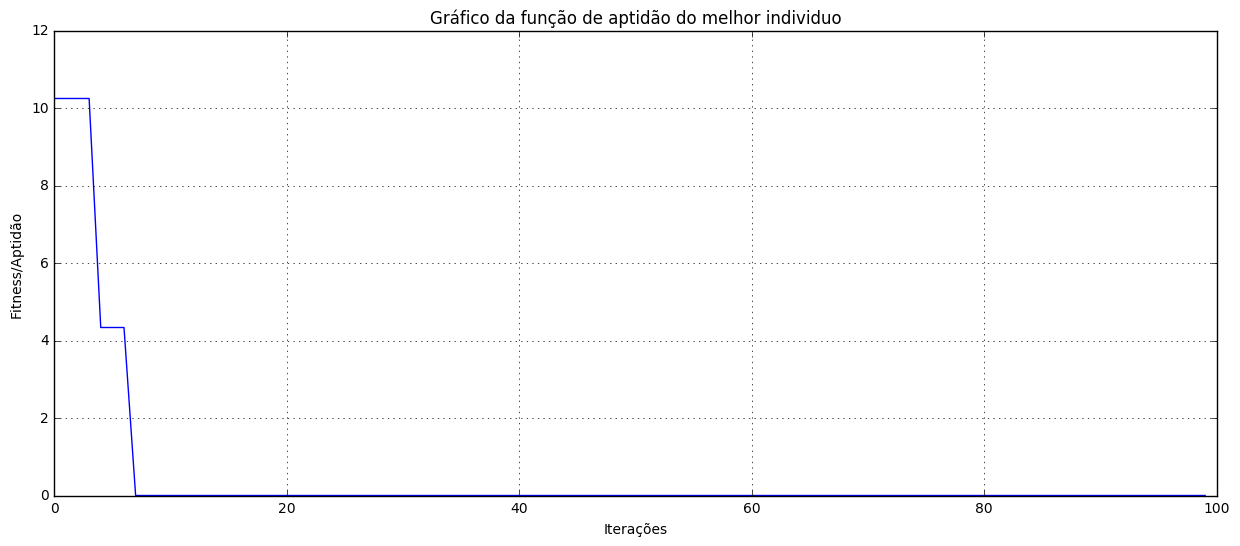

In [99]:
problema = GA(popsize=40,iterations=100,elitism=0.4,mutRate=0.4)
melhoresResultados=problema.runGA()
plotar(melhoresResultados)

### 5. Conclusão

<p style="text-align: justify;">Podemos concluir que o uso de algoritmos genéticos para solucionar um problema pode muitas vezes nos oferecer bons resultados. Todo o processo de busca da solução ótima acontece muito intuitivamente devido a sua smeelhança com o processo de evolução. A principal dificuldade muitas vezes é a de encontrar uma forma de codificar o cromossomo. Neste trabalho, não foi tão difícil, porém existem muitos problemas mais complexos que estes que possam requerer algo mais da codificação.
Nos testes feitos na Seção anterior, concluimos que:</p>

<p style="text-align: justify;"> 1. Variando o elitismo temos que quanto menor o elitismo a solução convergia com mais facilidade. E quando maior o elitismo, com menos facilidade a solução convergia. De forma intuitiva pode-se perceber que quanto maior o elitismo, mais individuos serão selecionados, e pode ser que indivíduos ruins estejam dentro deste conjunto, dessa maneira, a dificuldade de convergência pode ser justificada por esse fato. Quando tornamos o elitismo menor, as chances de obtermos indivíduos ruins pra gerações seguintes é menor.</p>
<p style="text-align: justify;">2. Variando a taxa de mutação verificamos que quanto maior a taxa de mutação, obtivemos soluções melhores mais rapidamente.</p>
<p style="text-align: justify;">3. Variando o tamanho da população quanto maior o tamanho da população, mais facilmente se converge para a solução ótima.</p>

<p style="text-align: justify;">Obs: Nas três conclusões acima referentes aos testes realizados, percebeu-se que algumas vezes resultados inesperados apareciam ao aumentar ou diminuir alguma variável fugindo do padrão descrito. Porém, na maioria dos testes, constatou-se o padrão descrito nos itens 1,2 e 3. Um possível motivo para este fato pode se dar pelo constante uso de aleatoriedade nas funções.</p>

### 6. Referências

Código disponível no github no seguinte link: https://github.com/jvitorc17/topicosIA/blob/master/trabalho-algoritmos-geneticos-rastringin.ipynb

Template usado no trabalho - Universidade de São Francisco: https://www.cs.usfca.edu/~brooks/F06classes/cs662/assignments/code/ga.py

Engelbrecht, A. P. (2007). Computational intelligence: an introduction. John Wiley &
Sons.